# 说明
Jupyter Notebook是进行代码实验非常好用的工具， 可以一边交互式的进行代码探索，一边利用markdown穿插丰富文本，图片，视频等描述资源。

另一方面，很多工程师也有写技术Blog记录自己的心得笔记的习惯。 如果能一边用Jupyter Notebook实验代码， 一边添加相关的文本描述， 最后直接将Jupyter Notebook的内容发布为Blog， 那将获得非常流畅的技术Blog创作体验。

(比如要写一份分析报告， 首先要开matlab编写代码， 运行代码， 将代码的结果保存为文本， 图片，Excel等文件， 然后再开Word， 一边写报告， 一边要导入图片， 数据。 更糟糕的是， 一旦代码发生更改， 程序生成的结果发生了改变， 可能又得重新调整Word文档。 这个过程非常的繁琐耗时。 由于报告的内容和代码并非紧密的结合， 如果时间一久， 那么很可能会想不起来当时某个处理的细节， 然后又找不到当时的代码。)

这篇文章就是讲解如何利用Pelican将Jupyter Notebook上做的实验直接发布在Git Pages上。

这里是一个效果展示。[这个git repo](https://github.com/hongfeibao1314/hongfeibao1314.github.io/tree/dev)用于存放jupyter notebooks实验，而[这里](https://hongfeibao1314.github.io/)是这个notebooks被发布成blogs以后的效果。


# 重要的组件
在Jupyter Notebook中编写内容， 然后由Pelican负责将jupyter notebook组装成blog html， Github Pages则提供了网站服务，让大家能通过浏览器看到你的Blog。

不过要注意的是，转成html后的代码部分是不能运行的，如果希望读者享受到Jupyter Notebook的便利，可以将文章对应的.ipynb源文件的地址(可以把源文件也放在Github)贴在文章里，供读者下载。例如这篇文章的。

## Github Pages
Github Pages是github公司提供的免费的静态网站托管服务，具体使用上，就是注册用户在Gihub上创建过一个[username].github.io的repo,并且在里面的master branch存有html文件的话，那么其他人就可以通过http://[username].github.io 这个链接访问到这些html页面。

例如我把这篇文章对应的0626_pelican_jupyter_blog.html放在了hongfeibao1314.github.io的repo中的master branch里(这里是[链接](https://hongfeibao1314.github.io/)，那么大家就可以通过(https://hongfeibao1314.github.io/0626_pelican_jupyter_blog) 看到这篇文章

如果用户愿意，也可以绑定自己准备的域名，代替http://[username].github.io

## Pelican
Pelican是一个基于python的开源库，可以将markdown, jupyter notebook(需要额外插件)等文件转成html文件，并根据meta-data和theme信息， 在生成的html中添加分类，标签，菜单，侧边栏等组件和相应的css style，生成可以用于Blog使用的html文件。

## Jupyter Notebook
jupyter notebook提供了一个交互环境，可以在web浏览器一边编写code，运行并展示结果，一边用markdown添加图文视频等丰富的内容进行相应的描述。代码调试完，文章也写完，省去了将code复制粘贴到文章的繁琐的过程。既省事，也避免了文章中的code和运行时的code不一致的问题。

另一方面，如果读者如果下载了jupyter notebook源文件，就可以直接在浏览器上边看文章，边调试代码，体验也流畅很多。

Jupyter notebook支持python, R, scala, Julia等40多种编程语言， 如果对Jupyter Notebook不了解的话，请去[官网](http://jupyter.org/)了解一下(似乎被墙了，请自备梯子)。

下面就是Jupyter Notebook编写了一段可视化代码，运行后展示结果的例子。

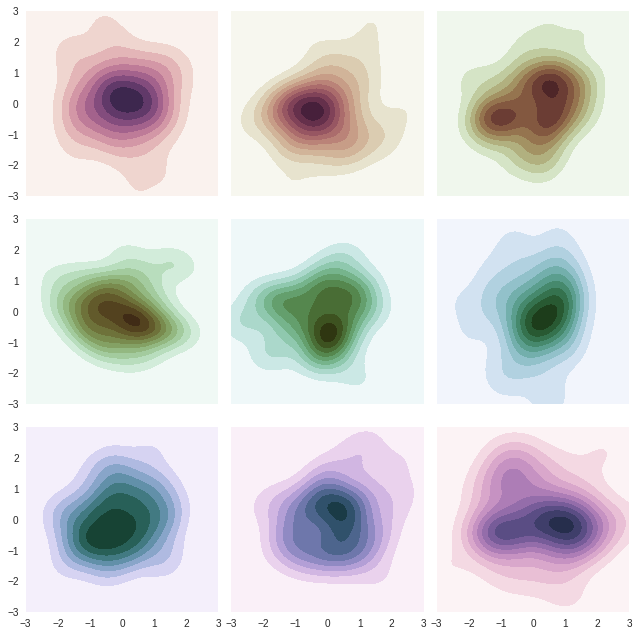

In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="dark")
rs = np.random.RandomState(50)

# Set up the matplotlib figure
f, axes = plt.subplots(3, 3, figsize=(9, 9), sharex=True, sharey=True)

# Rotate the starting point around the cubehelix hue circle
for ax, s in zip(axes.flat, np.linspace(0, 3, 10)):

    # Create a cubehelix colormap to use with kdeplot
    cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)

    # Generate and plot a random bivariate dataset
    x, y = rs.randn(2, 50)
    sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=ax)
    ax.set(xlim=(-3, 3), ylim=(-3, 3))

f.tight_layout()

# 系统环境
* 我的操作系统是Ubunut 16.04
* Python版本是2.7

windows/mac或是python3.5的话安装过程请自行做一些相应的调整-_-

# 步骤

## 安装Pelican和Jupyter
下面是安装过程

* 创建一个文件夹， 我用的名字是jupyter-blog
* (可选步骤)在jupyter-blog新建一个virtual env, 不会的话请看[这里](http://docs.python-guide.org/en/latest/dev/virtualenvs/)

当然如果不需要让Pelican使用单独的的python环境的话， 跳过这个步骤也没问题
* 安装所需的依赖包
由于所需的依赖比较多，因此可以在jupyter-blog创建requirements.txt文件后一起安装。 requirements.txt中的内容是
```
Markdown
pelican
jupyter
ipython
nbconvert
beautifulsoup4
matplotlib
```
然后运行```pip install -r requirements.txt```进行安装。 

## 初始化Pelican

在jupyter-blog目录运行```pelican-quickstart```，会弹出一系列的问题，全部填完后Pelican就会完成初始化

下面只列出几个重要的问题， 和我填的内容, 根据自己的情况调整即可。剩余的问题直接按回车，使用默认值即可。

```
What will be the title of this web site? HongfeiBao's Blog
Who will be the author of this web site? HongfeiBao
What will be the default language of this web site? en
Do you want to specify a URL prefix? e.g., http://example.com (Y/n) n
What is your time zone? [Europe/Paris] Asia/Shanghai
```

这步骤完成后， 文件夹的结构看上去应该是这样的
```
jupyter-blog
│   output
│   content
│   develop_server.sh
│   fabfile.py
│   Makefile
│   requirements.txt
│   pelicanconf.py
│   publishconf.py
```

## 安装Jupyter Notebook插件
经过前面的步骤,Pelican已经算是安装好了，但是默认情况下，它是不支持Jupyter Notebook的,因此需要额外的安装Jupyter Plugin。

* 如果没有安装git, 先用sudo apt-get install git安装git
* 在jupyter-blog运行```git init```， 将jupyter-blog变成git repository
* 在jupyter-blog中创建一个叫plugin的文件夹
* 在jupyter-blog中运行```git submodule add git://github.com/danielfrg/pelican-ipynb.git plugins/ipynb```

为了激活插件，还要记得修改jupyter-blog中的pelicanconf.py文件，在最后添加以下几行，并且保存
```
MARKUP = ('md', 'ipynb')

PLUGIN_PATHS = [ './plugins' ]  # 如果像原文直接PLUGIN_PATH = `./plugins`而不使>用列表会报warning
PLUGINS = ['ipynb.markup']
```


## 发布Blog
### 编写Jupyter Notebook
* 在jupyter-blog/content/下打开jupyter notebook， 撰写第一份blog， 并且保存为.ipynb文件。 已当前的这篇文章为例， 我使用的文件名是0626_pelican_jupyter_blog.ipynb

* 然后新建一个同名的文件, 但是后缀要改成.ipynb-meta。 在我的例子里， 就是0626_pelican_jupyter_blog.ipynb-meta<br>
这个文件主要是为了定义blog的名称，作者，时间，分类等信息, pelican生成html的时候需要用到这些信息。 在该文件中添加以下信息(请根据自己的情况修改)

```
Title: 如何用pelican, jupyter notebook搭建技术博客
Slug: 0626_pelican_jupyter_blog
Date: 2017-06-26 18:42
Category: tools
Tags: pelican jupyter blog tool
Author: Hongfei Bao
Summary: 简单介绍了如何在Ubuntu16.04系统下利用Pelican和GitPages，用Jupyter Notebook撰写Blog
```

```Slug```是访问这篇Blog所需要的url路径。例如Server地址是http://hongfeibao1314.github.io/ 的话, 那么这篇blog的访问链接就是http://hongfeibao1314.github.io/0626_pelican_jupyter_blog

```Tags```表示标签， 不过多个Tag之间注意要用空格去区分

其余的应该不用解释了:)

这步骤完成后， 文件夹的结构看上去应该是这样的
```
jupyter-blog
│   output
│   content
    | 0626_pelican_jupyter_blog.ipynb
    | 0626_pelican_jupyter_blog.ipynb-meta
│   develop_server.sh
│   fabfile.py
│   Makefile
│   requirements.txt
│   pelicanconf.py
│   publishconf.py
```


In [1]:
from __future__ import unicode_literals

## 生成HTML文件并在本地测试
* 切换到jupyter-blog文件夹
* 运行```pelican content```。 这样Pelican就会读取jupyter-blog/content文件夹中的.ipynb和.ipynb-meta文件，并且结合theme等内容， 在jupyter-blog/output文件夹中生成相应的html文件。运行完这步后，可以在output文件夹中看到新增了不少.html文件
* 切换到jupyter-blog/output文件夹， 运行```python -m pelican.server```启动一个本地的服务起， 然后打开浏览器，输入localhost:8000，一切顺利的话就可以看到自己的blog文章页面

## 将HTML文件部署到到GitHub Pages
* 没注册Github的，先去[Github](www.github.com)注册
* 在github创建一个叫[username].github.io的repository, **把[username]替换成注册时用的username,后面相同。**
* 将本地的jupyter-blog文件夹和github上的[username].github.io建立连接<br>
切换到jupyter-blog文件夹后运行```git remote add origin git@github.com:[username]/[username].github.io.git```
* 在jupyter-blog创建一个.gitignore(这不是后缀，完整的文件名就是这样)文件， 里面的内容可以参考[这里](https://github.com/github/gitignore/blob/master/Python.gitignore)， 将一些不必要的内容排除出git同步的范围。
* 修改publishconf.py文件， 将SITEURL改成https://[username].github.io 例如我的是:(https:hongfeibao1314.github.io)

    
要部署到GitPages前，在jupyter-blog运行```pelican content -s publishconf.py```,重新生成html文件
(如果要在本地预览，用```pelican content```)

最后利用
```
ghp-import output -b master
git push origin master
```
提交html页面至[username].github.io的master repo即可。

注:GitHub Pages识别的是[username].github.io中master branch repo根目录下的.html文件， 而我们本地生成的html文件是在output文件家中， 因此这里才需要```ghp-import```的协助，将output文件夹中的内容部署后实现放在[username].github.io根目录下。

成功后就可以在[username].github.io的master分支看到变化。 不过如果要在https://[username].github.io 的页面上看到变化，可能要等上几分钟。

##### git报错可以参考 [这里](http://blog.csdn.net/god_wot/article/details/10522405)
另外publishconf.py里面我加了这个(3.5应该不需要)
```
import sys
reload(sys)
sys.setdefaultencoding('utf-8')
```

，以后如果要改Jupyter notebook,基本上运行
```
pelican content -s publishconf.py
ghp-import output -b master
git push origin master
```
这三条命令就可以了.

## 将.ipynb文件也同步到Github

如果除了生成的html文件，我们需要将content文件夹中的.ipynb等文件也在[username].github.io保留一份，可以新建一个dev branch，git checkout -b dev(git checkout命令加上-b参数表示创建并切换)<br> 
然后用经典的
```
git add --all
git commit -m 'you comment'
git push origin dev
```
流程将```jupyter-blog```的内容添加到dev branch即可。

## 更改Theme和添加插件
可以去查询pelican的[官方文档](http://docs.getpelican.com/en/3.6.3/)和pelican的[Theme站](https://github.com/getpelican/pelican-themes)自己去进行配置。

除此之外，也可以去Pelican的[插件站](https://github.com/getpelican/pelican-plugins)挑选对自己有用的插件。

由于每个Theme和插件的配置方式都有有些不同，以Theme和插件自己的说明为准。这里就不详细介绍了。